In [1]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Modelling and Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge
#from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df = pd.read_csv('dataset.csv')

#Checking the dataset first 10 rows
df.head(10)

,Unnamed: 0,demand [MW],solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s]
0,2017-01-01 00:00:00+01:00,76345.25,0.00,NaN,5756.44,597.50,10513.95,0.00,2.45,-3.80,102875.0,0.00,271.60,269.82,269.84,209.0,2.97
1,2017-01-01 01:00:00+01:00,75437.00,0.00,NaN,5756.44,597.50,10513.95,0.00,2.48,-3.46,102839.0,0.00,271.62,269.85,269.79,212.0,3.13
2,2017-01-01 02:00:00+01:00,73368.25,0.00,NaN,5756.44,635.25,10513.95,0.00,4.62,-5.48,102735.0,0.00,271.61,269.93,269.58,218.0,3.25
3,2017-01-01 03:00:00+01:00,72116.00,0.00,NaN,5756.44,628.50,10513.95,0.00,6.13,-6.91,102660.0,0.00,271.60,269.99,269.44,218.0,3.37
4,2017-01-01 04:00:00+01:00,68593.75,0.00,NaN,5756.44,608.50,10513.95,0.00,6.75,-7.50,102629.0,0.00,271.60,270.02,269.38,219.0,3.42
5,2017-01-01 05:00:00+01:00,65865.75,0.00,NaN,5756.44,634.25,10513.95,0.00,6.92,-6.78,102594.0,0.00,271.60,270.04,269.35,219.0,3.48
6,2017-01-01 06:00:00+01:00,64856.50,0.00,NaN,5756.44,662.75,10513.95,0.00,7.26,-5.34,102523.0,0.00,271.60,270.07,269.30,217.0,3.63
7,2017-01-01 07:00:00+01:00,64406.00,0.00,NaN,5756.44,681.00,10513.95,3.80,8.00,-4.20,102472.0,4.30,271.96,270.61,269.62,216.0,3.76
8,2017-01-01 08:00:00+01:00,64462.25,13.75,NaN,5756.44,742.50,10513.95,12.96,9.37,-3.19,102436.0,14.69,272.84,271.89,270.47,209.0,3.90
9,2017-01-01 09:00:00+01:00,64828.75,84.00,NaN,5756.44,792.25,10513.95,22.13,10.74,-2.19,102400.0,25.08,273.71,273.16,271.32,205.0,4.09


In [3]:
#Checking the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    45432 non-null  object 
 1   demand [MW]                   45429 non-null  float64
 2   solar_actual [MW]             45413 non-null  float64
 3   solar_forecast [MW]           45210 non-null  float64
 4   solar_inferred_capacity [MW]  45432 non-null  float64
 5   wind_actual [MW]              45413 non-null  float64
 6   wind_inferred_capacity [MW]   45432 non-null  float64
 7   albedo [%]                    45415 non-null  float64
 8   cloud_cover [%]               45416 non-null  float64
 9   frozen_precipitation [%]      45422 non-null  float64
 10  pressure [Pa]                 45421 non-null  float64
 11  radiation [W/m2]              45416 non-null  float64
 12  air_tmp [Kelvin]              45422 non-null  float64
 13  g

In [4]:
#Rename Columns 
df.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
df.rename(columns = {'demand [MW]':'Y'}, inplace = True)


In [5]:
#Check duplicated
df[df.duplicated(keep=False)]

,Date,Y,solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s]


In [6]:
#Drop NA
df = df.dropna(axis=0)

In [7]:
#Checking the dataset size after dropping NA
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45202 entries, 192 to 45431
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          45202 non-null  object 
 1   Y                             45202 non-null  float64
 2   solar_actual [MW]             45202 non-null  float64
 3   solar_forecast [MW]           45202 non-null  float64
 4   solar_inferred_capacity [MW]  45202 non-null  float64
 5   wind_actual [MW]              45202 non-null  float64
 6   wind_inferred_capacity [MW]   45202 non-null  float64
 7   albedo [%]                    45202 non-null  float64
 8   cloud_cover [%]               45202 non-null  float64
 9   frozen_precipitation [%]      45202 non-null  float64
 10  pressure [Pa]                 45202 non-null  float64
 11  radiation [W/m2]              45202 non-null  float64
 12  air_tmp [Kelvin]              45202 non-null  float64
 13 

In [8]:
#Format datetime
df.Date=pd.to_datetime(df.Date,utc=True)

# Sorting data in ascending order by the date
df = df.sort_values(by='Date')

#Set Date as index
df.set_index('Date', inplace=True)

In [9]:
df.head(10)

,Y,solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s]
Date,,,,,,,,,,,,,,,,
2017-01-08 23:00:00+00:00,72921.75,0.00,0.55,5756.44,1151.00,10513.95,0.00,64.91,-1.06,103114.0,0.00,274.13,273.44,271.90,178.0,4.14
2017-01-09 00:00:00+00:00,70956.00,0.00,0.55,5756.44,1103.75,10513.95,0.00,63.71,-0.96,103109.0,0.00,274.01,273.32,271.78,180.0,4.13
2017-01-09 01:00:00+00:00,68422.50,0.00,0.55,5756.44,1111.00,10513.95,0.00,59.69,-0.48,103070.0,0.00,273.82,273.14,271.51,180.0,4.04
2017-01-09 02:00:00+00:00,67520.50,0.00,0.06,5756.44,1165.00,10513.95,0.00,56.84,-0.14,103042.0,0.00,273.68,273.01,271.32,190.0,4.07
2017-01-09 03:00:00+00:00,64729.25,0.00,0.06,5756.44,1210.75,10513.95,0.00,55.66,0.00,103031.0,0.00,273.63,272.96,271.24,190.0,4.10
2017-01-09 04:00:00+00:00,63864.50,0.00,0.06,5756.44,1185.25,10513.95,0.00,55.56,-0.29,103010.0,0.00,273.57,272.90,271.19,198.0,4.08
2017-01-09 05:00:00+00:00,66086.75,0.00,0.55,5756.44,1168.00,10513.95,0.00,55.36,-0.87,102967.0,0.00,273.45,272.77,271.09,209.0,4.12
2017-01-09 06:00:00+00:00,71651.00,0.00,0.55,5756.44,1241.00,10513.95,3.34,56.22,-0.89,102942.0,3.24,273.66,273.08,271.35,206.0,4.15
2017-01-09 07:00:00+00:00,78221.25,27.75,17.27,5756.44,1320.00,10513.95,11.41,58.53,-0.25,102931.0,11.08,274.34,273.98,272.12,213.0,4.10


In [10]:
df.describe()

,Y,solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s]
count,45202.000000,45202.000000,45202.000000,45202.000000,45202.000000,45202.000000,45202.000000,45202.000000,45202.000000,45202.000000,45202.000000,45202.000000,45202.000000,45202.000000,45202.000000,45202.000000
mean,53426.420418,1289.892801,1278.937576,8266.976570,3624.040546,14336.238813,11.156699,55.345305,-31.634926,101750.019734,161.224163,284.371025,284.292421,283.316715,190.283638,5.619026
std,11733.759596,1784.932856,1761.382969,1612.296701,2710.513500,1837.032700,8.463591,25.866661,19.963628,793.561905,220.718471,6.825033,7.450531,7.828040,59.966740,2.159430
min,29415.000000,0.000000,0.000000,5756.440000,391.000000,10494.090000,0.000000,0.000000,-50.000000,97862.000000,0.000000,265.340000,265.250000,259.800000,50.000000,1.270000
25%,44446.812500,0.000000,0.000000,6864.480000,1590.062500,12256.000000,0.000000,34.890000,-47.410000,101344.000000,0.000000,279.180000,278.670000,277.142500,141.000000,4.070000
50%,51707.625000,176.000000,154.575000,7992.890000,2722.625000,15009.340000,14.750000,57.920000,-38.700000,101786.000000,26.650000,283.670000,283.430000,283.100000,193.000000,5.220000
75%,61565.375000,2272.437500,2332.165000,9595.960000,4936.250000,15985.940000,17.170000,77.050000,-21.670000,102213.000000,282.490000,289.037500,288.990000,289.010000,240.000000,6.730000
max,94587.250000,8511.750000,7900.170000,11244.010000,14475.750000,16116.790000,31.550000,99.940000,88.290000,104134.000000,916.430000,308.000000,310.320000,308.370000,325.000000,16.930000


In [11]:
#Checking the dataset first 10 rows
df.head(10)

,Y,solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s]
Date,,,,,,,,,,,,,,,,
2017-01-08 23:00:00+00:00,72921.75,0.00,0.55,5756.44,1151.00,10513.95,0.00,64.91,-1.06,103114.0,0.00,274.13,273.44,271.90,178.0,4.14
2017-01-09 00:00:00+00:00,70956.00,0.00,0.55,5756.44,1103.75,10513.95,0.00,63.71,-0.96,103109.0,0.00,274.01,273.32,271.78,180.0,4.13
2017-01-09 01:00:00+00:00,68422.50,0.00,0.55,5756.44,1111.00,10513.95,0.00,59.69,-0.48,103070.0,0.00,273.82,273.14,271.51,180.0,4.04
2017-01-09 02:00:00+00:00,67520.50,0.00,0.06,5756.44,1165.00,10513.95,0.00,56.84,-0.14,103042.0,0.00,273.68,273.01,271.32,190.0,4.07
2017-01-09 03:00:00+00:00,64729.25,0.00,0.06,5756.44,1210.75,10513.95,0.00,55.66,0.00,103031.0,0.00,273.63,272.96,271.24,190.0,4.10
2017-01-09 04:00:00+00:00,63864.50,0.00,0.06,5756.44,1185.25,10513.95,0.00,55.56,-0.29,103010.0,0.00,273.57,272.90,271.19,198.0,4.08
2017-01-09 05:00:00+00:00,66086.75,0.00,0.55,5756.44,1168.00,10513.95,0.00,55.36,-0.87,102967.0,0.00,273.45,272.77,271.09,209.0,4.12
2017-01-09 06:00:00+00:00,71651.00,0.00,0.55,5756.44,1241.00,10513.95,3.34,56.22,-0.89,102942.0,3.24,273.66,273.08,271.35,206.0,4.15
2017-01-09 07:00:00+00:00,78221.25,27.75,17.27,5756.44,1320.00,10513.95,11.41,58.53,-0.25,102931.0,11.08,274.34,273.98,272.12,213.0,4.10


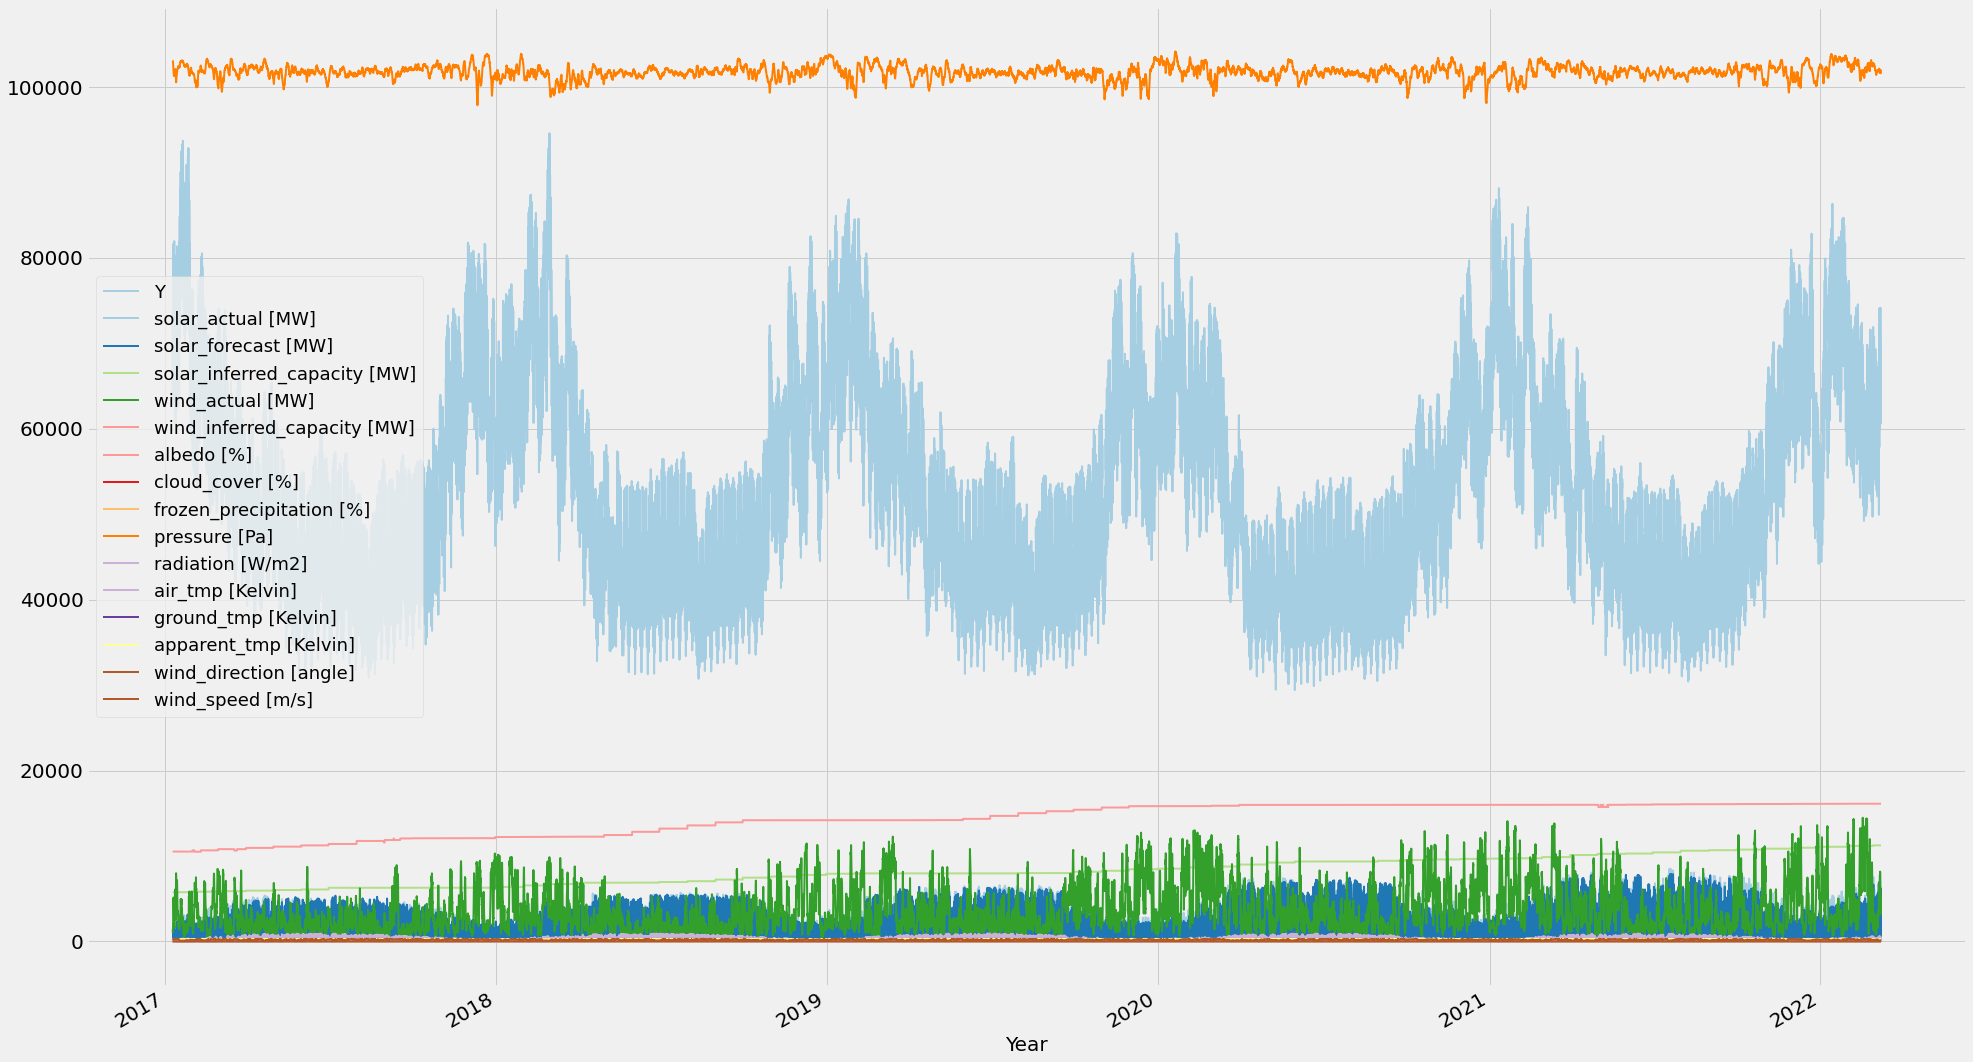

In [12]:
# setting the graph size globally
plt.rcParams['figure.figsize'] = (30,20)


# Visulize 5 years data

df.plot(colormap='Paired', linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('', fontsize=20)
plt.legend(fontsize=18)
plt.show()

In [13]:
#Add new columns
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday + 1 #in pandas, the day of the week with Monday=0, Sunday=6.
df['Hour'] = df.index.hour


In [14]:
# setting the graph size globally
plt.rcParams['figure.figsize'] = (30,20)

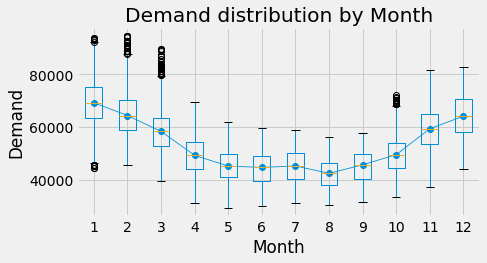

In [15]:
# Boxplot for annual seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3.5))
df.boxplot(column='Y', by='Month', ax=ax,)
df.groupby('Month')['Y'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Demand')
ax.set_title('Demand distribution by Month')
fig.suptitle('');

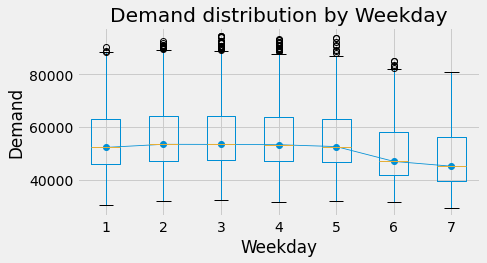

In [16]:
# Boxplot for weekly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3.5))
df.boxplot(column='Y', by='Weekday', ax=ax)
df.groupby('Weekday')['Y'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Demand')
ax.set_title('Demand distribution by Weekday')
fig.suptitle('');


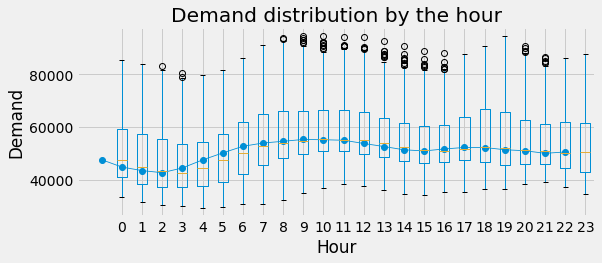

In [17]:
# Boxplot for daily seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 3.5))
df.boxplot(column='Y', by='Hour', ax=ax)
df.groupby('Hour')['Y'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Demand')
ax.set_title('Demand distribution by the hour')
fig.suptitle('');
plt.show()

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

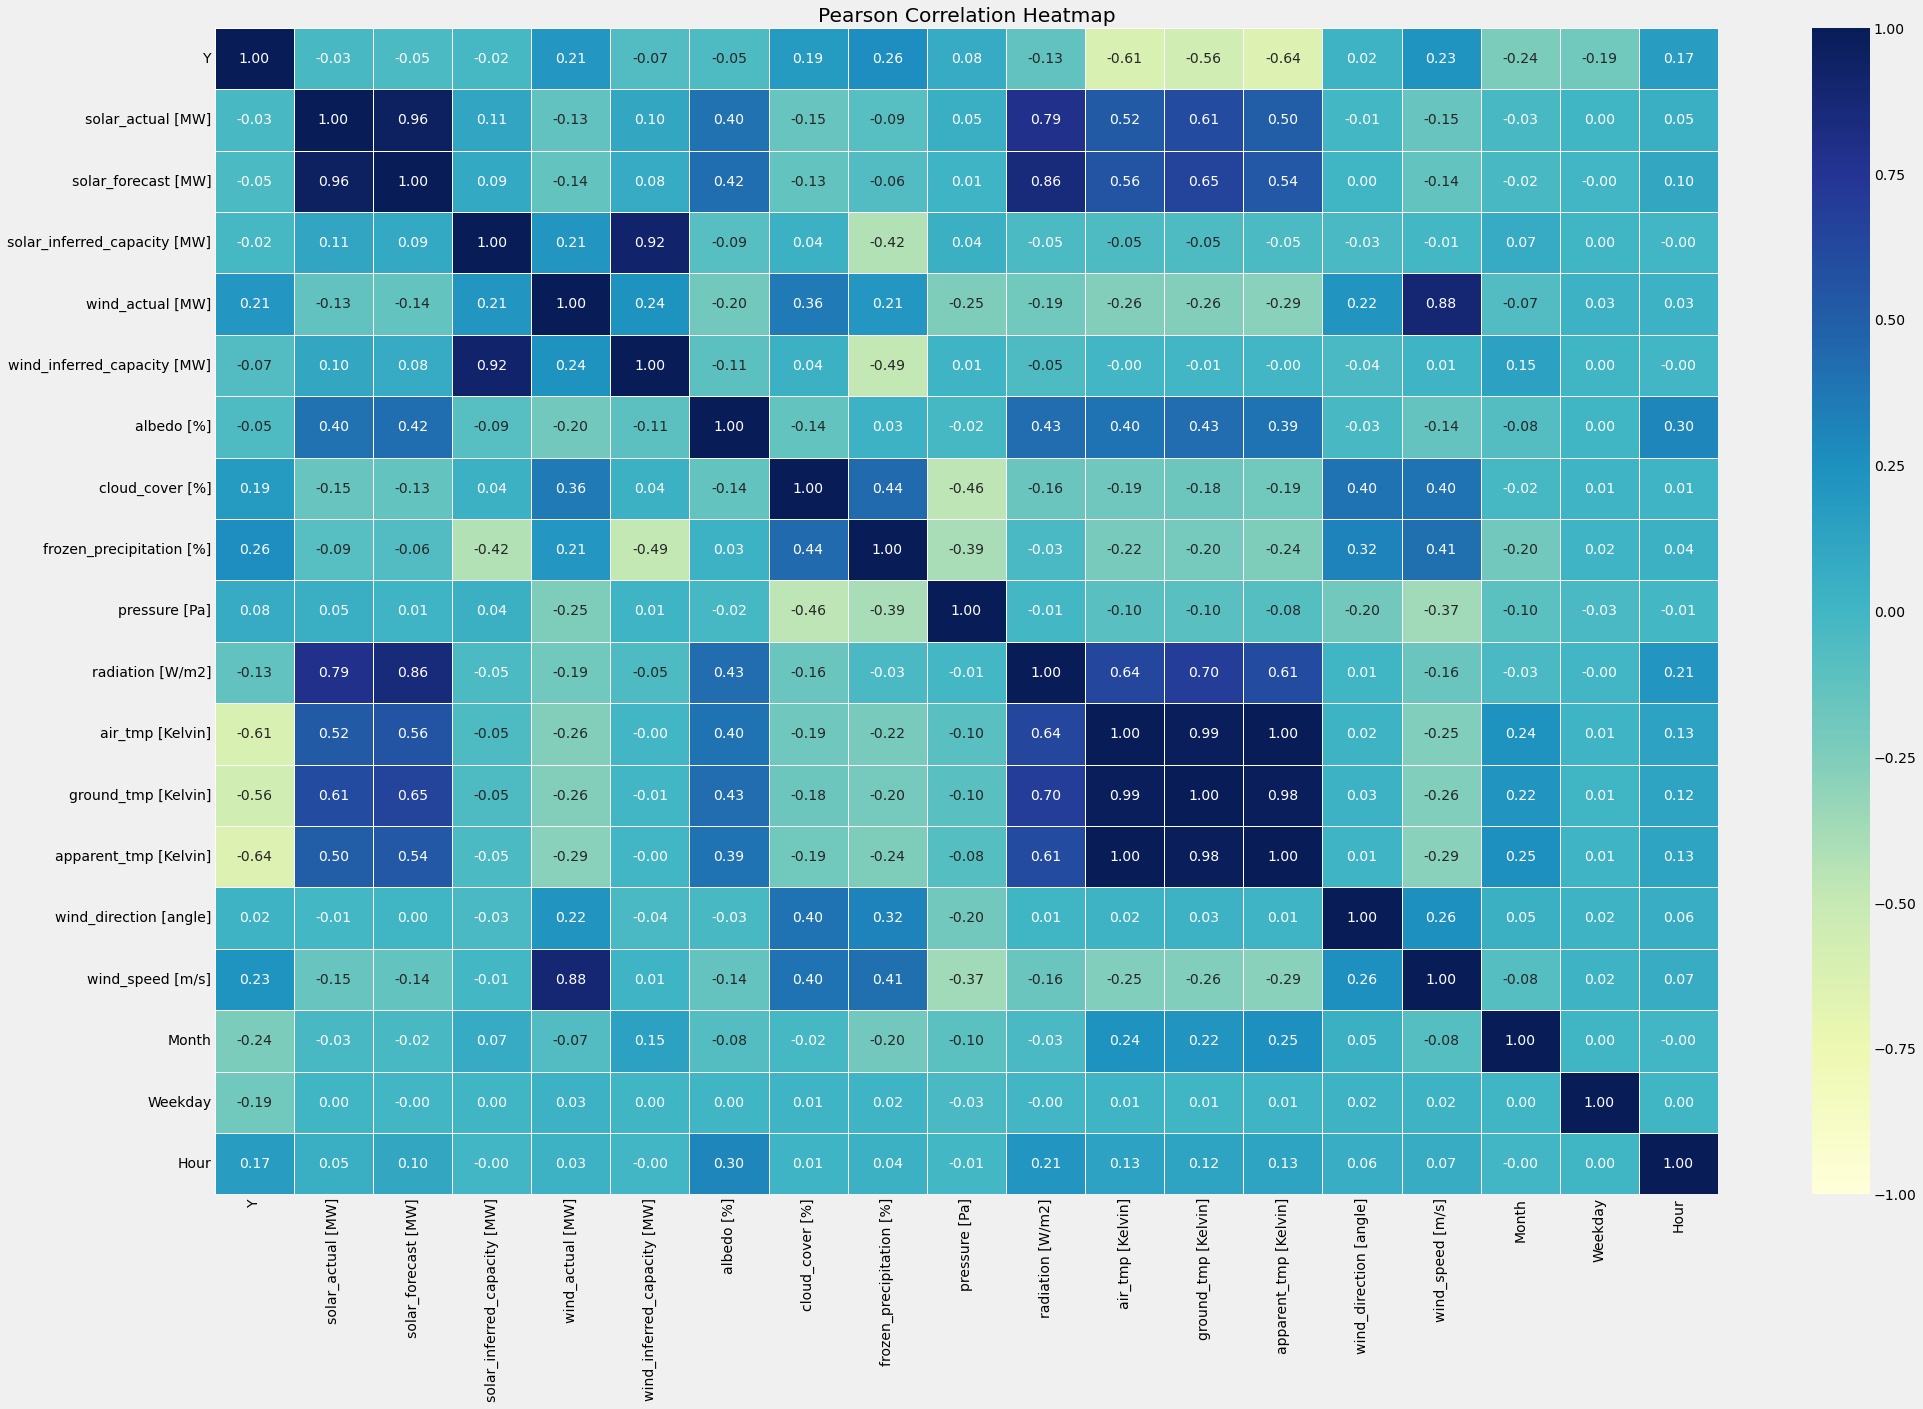

In [18]:

# Pearson Correlation Heatmap
corr_matrix = df.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Pearson Correlation Heatmap")

In [19]:
# MLR import
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [20]:
#Identifiy Y
x = "Y"


In [21]:
## split data
df_train, df_test = model_selection.train_test_split(df, 
                      test_size=0.2)

In [22]:
## print info
print("X_train shape:", df_train.drop("Y",axis=1).shape, "| X_test shape:", df_test.drop("Y",axis=1).shape)
print("y_train mean:", round(np.mean(df_train["Y"]),2), "| y_test mean:", round(np.mean(df_test["Y"]),2))
print(df_train.shape[1], "features:", df_train.drop("Y",axis=1).columns.to_list())

X_train shape: (36161, 18) | X_test shape: (9041, 18)
y_train mean: 53486.55 | y_test mean: 53185.94
19 features: ['solar_actual [MW]', 'solar_forecast [MW]', 'solar_inferred_capacity [MW]', 'wind_actual [MW]', 'wind_inferred_capacity [MW]', 'albedo [%]', 'cloud_cover [%]', 'frozen_precipitation [%]', 'pressure [Pa]', 'radiation [W/m2]', 'air_tmp [Kelvin]', 'ground_tmp [Kelvin]', 'apparent_tmp [Kelvin]', 'wind_direction [angle]', 'wind_speed [m/s]', 'Month', 'Weekday', 'Hour']


In [23]:
##### Ensemble methods   gradient boosting algorithm
X = df_train.drop("Y", axis=1).values

# ## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(20.0, 80.0))
X = scalerX.fit_transform(df_train.drop("Y", axis=1))
df_scaled= pd.DataFrame(X, columns=df_train.drop("Y", 
                         axis=1).columns, index=df_train.index)
# ## scale Y
y="Y"
scalerY = preprocessing.RobustScaler(quantile_range=(20.0, 80.0))
df_scaled[y] = scalerY.fit_transform(
                     df_train[y].values.reshape(-1,1))
df_scaled.head()


,solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s],Month,Weekday,Hour,Y
Date,,,,,,,,,,,,,,,,,,,
2019-08-11 17:00:00+00:00,0.144160,0.638477,0.000000,-0.034852,0.000000,0.011080,0.217969,0.091763,-0.163685,1.045262,0.673554,0.696638,0.609875,0.247934,-0.101190,0.285714,0.75,0.333333,-0.599993
2018-09-23 17:00:00+00:00,0.672186,0.353681,-0.224872,1.262989,-0.285496,-0.024377,0.061328,0.626370,0.169946,0.539288,0.642975,0.601251,0.580668,0.768595,1.267857,0.428571,0.75,0.333333,-0.559691
2017-07-27 17:00:00+00:00,0.829718,0.823742,-0.511832,0.171758,-0.955900,0.024931,0.191797,0.527091,-0.523256,1.183079,0.867769,0.860829,0.768428,0.586777,0.416667,0.142857,0.00,0.333333,-0.142421
2018-06-23 02:00:00+00:00,-0.062605,-0.054239,-0.331041,0.131378,-0.579214,-0.816620,-1.072070,-0.331663,0.643113,-0.076067,-0.034711,-0.079750,-0.046592,-0.975207,0.318452,0.000000,0.50,-0.666667,-0.631093
2018-05-07 21:00:00+00:00,-0.062605,-0.051058,-0.333396,-0.251411,-0.679002,0.499723,-0.484180,0.462574,-0.378354,-0.029987,0.381818,0.279124,0.360918,-0.355372,-0.333333,-0.142857,-0.75,0.600000,-0.384044


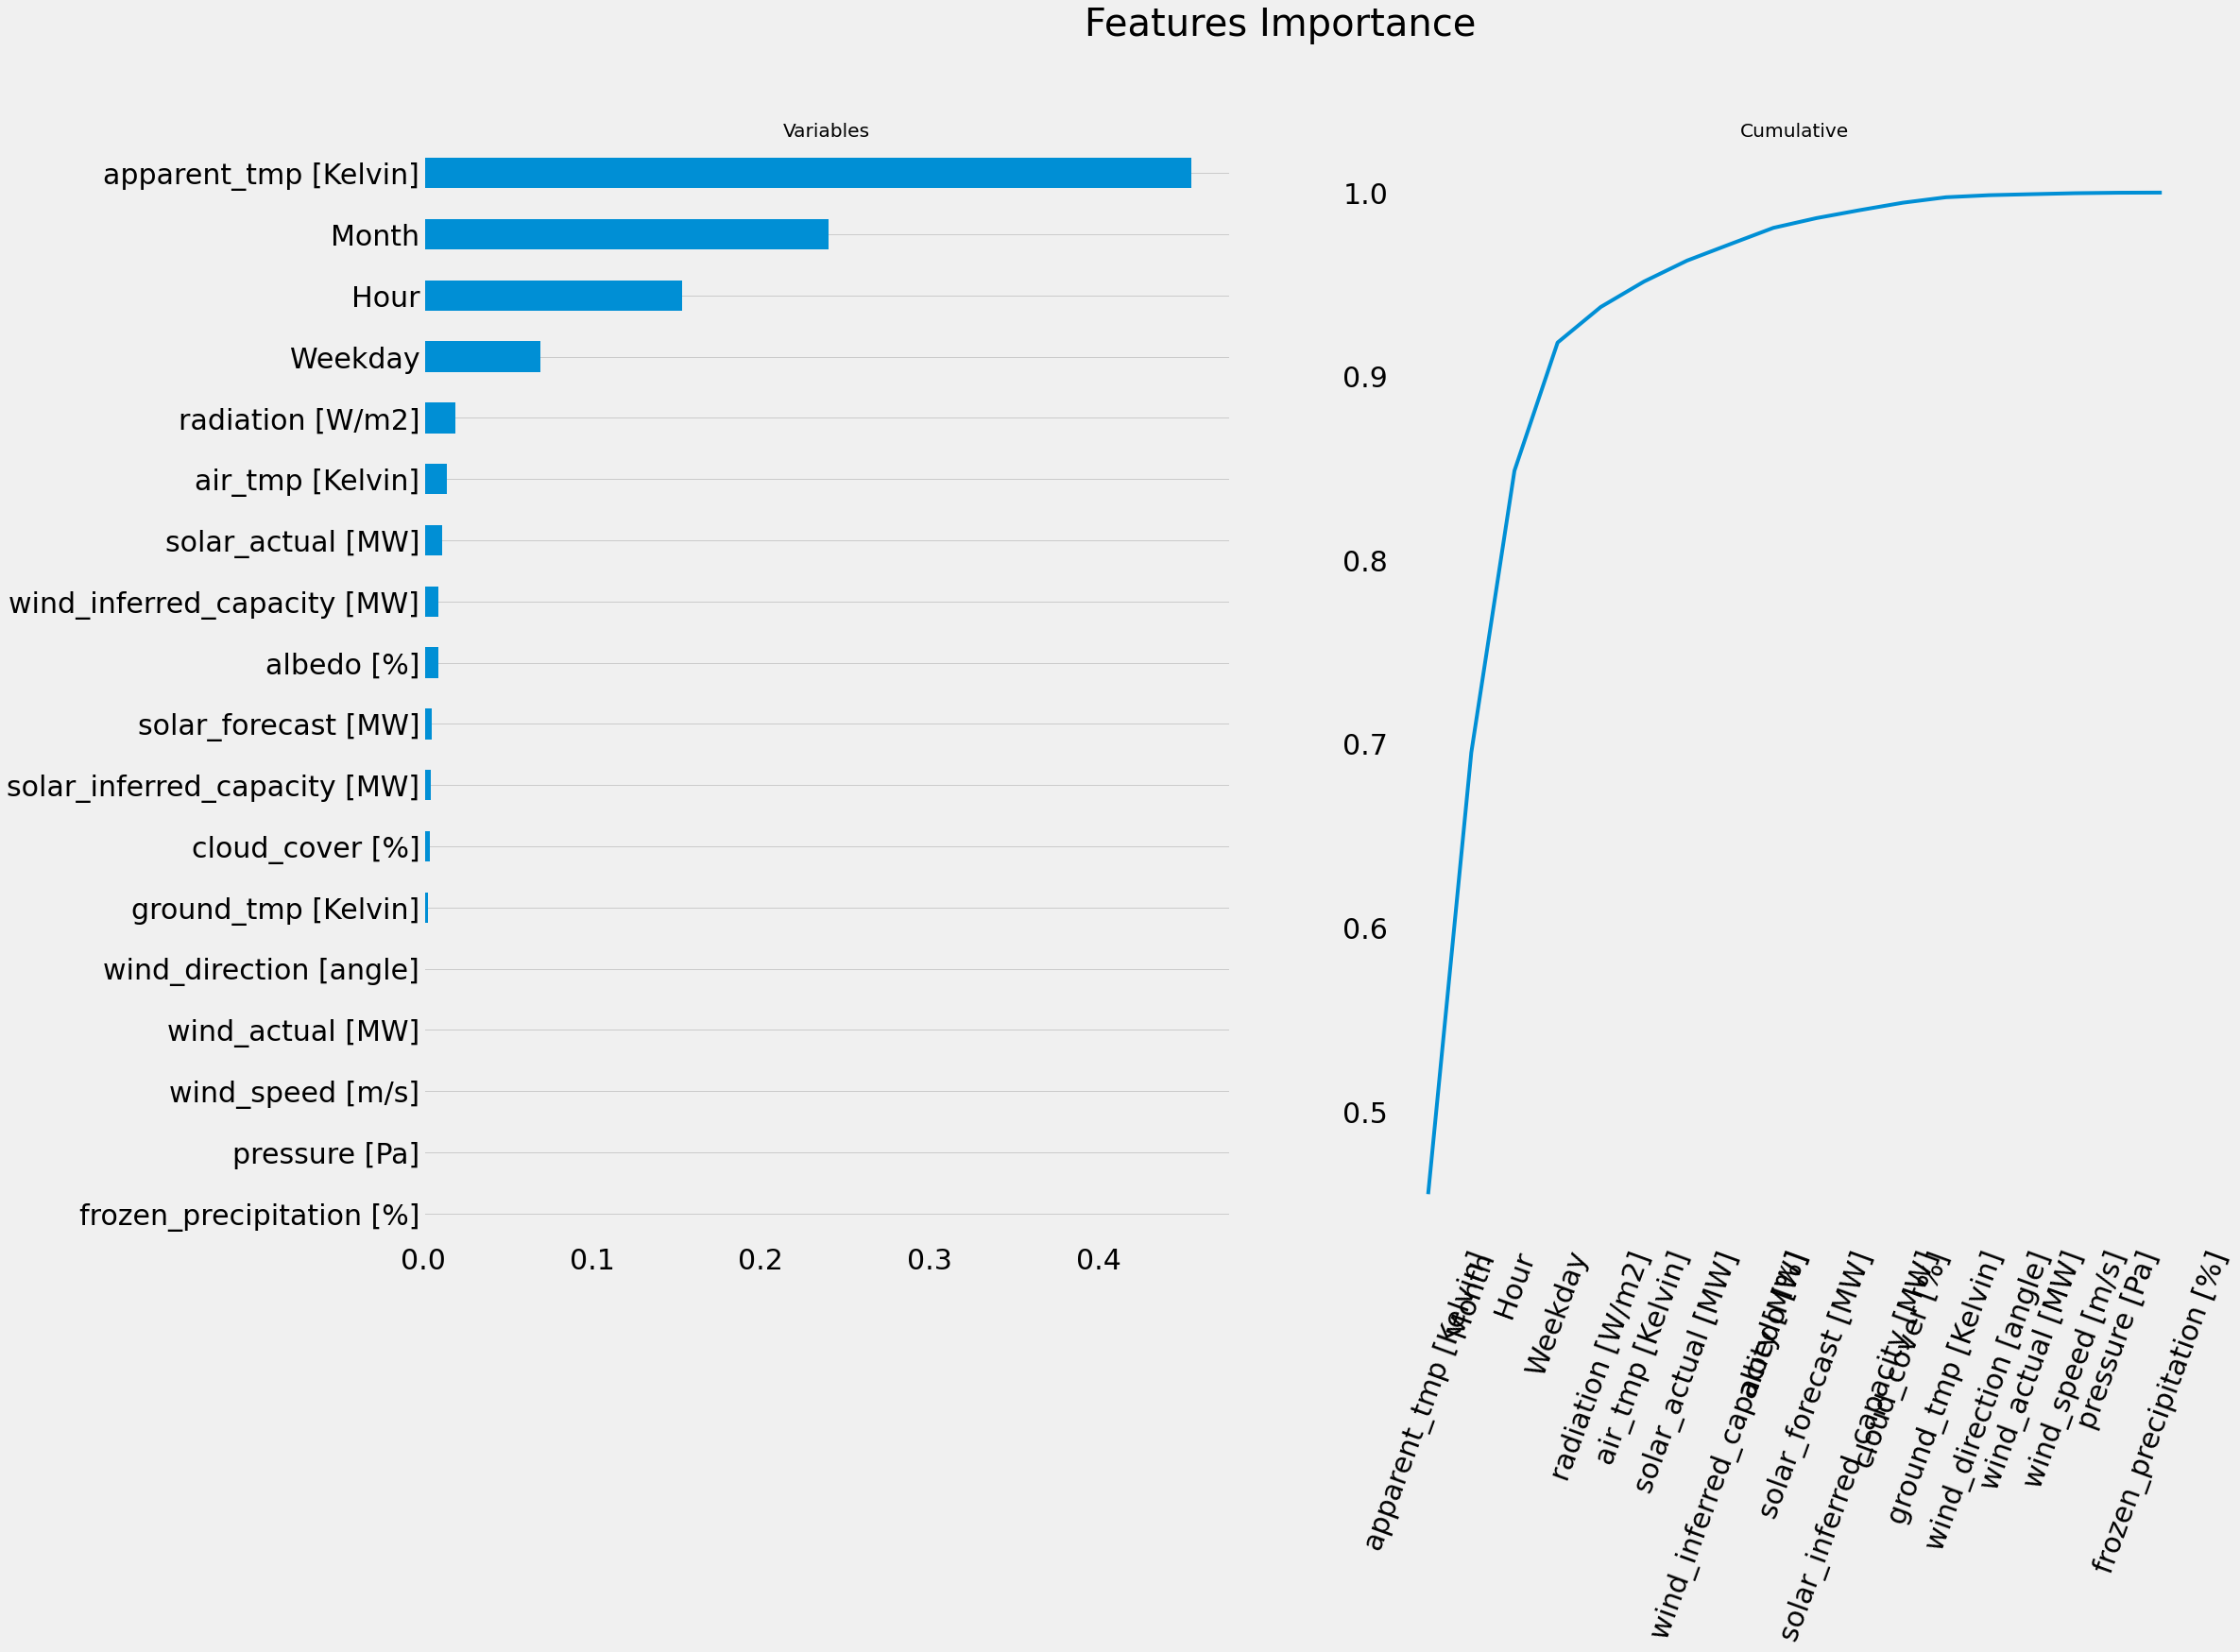

In [24]:
## Use gradient boosting algorithm calculate importance
## define y value
y = df_train["Y"].values
feature_names = df_train.drop("Y", axis=1).columns.tolist()

## call model
model = ensemble.GradientBoostingRegressor()

## Importance calculation
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas df
df_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
df_importances['cumsum'] = df_importances['IMPORTANCE'].cumsum(axis=0)
df_importances = df_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=40)
ax[0].title.set_text('Variables')
df_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0],fontsize=30).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('Cumulative')
df_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1],fontsize=30)
ax[1].set(xlabel="", xticks=np.arange(len(df_importances)), 
          xticklabels=df_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

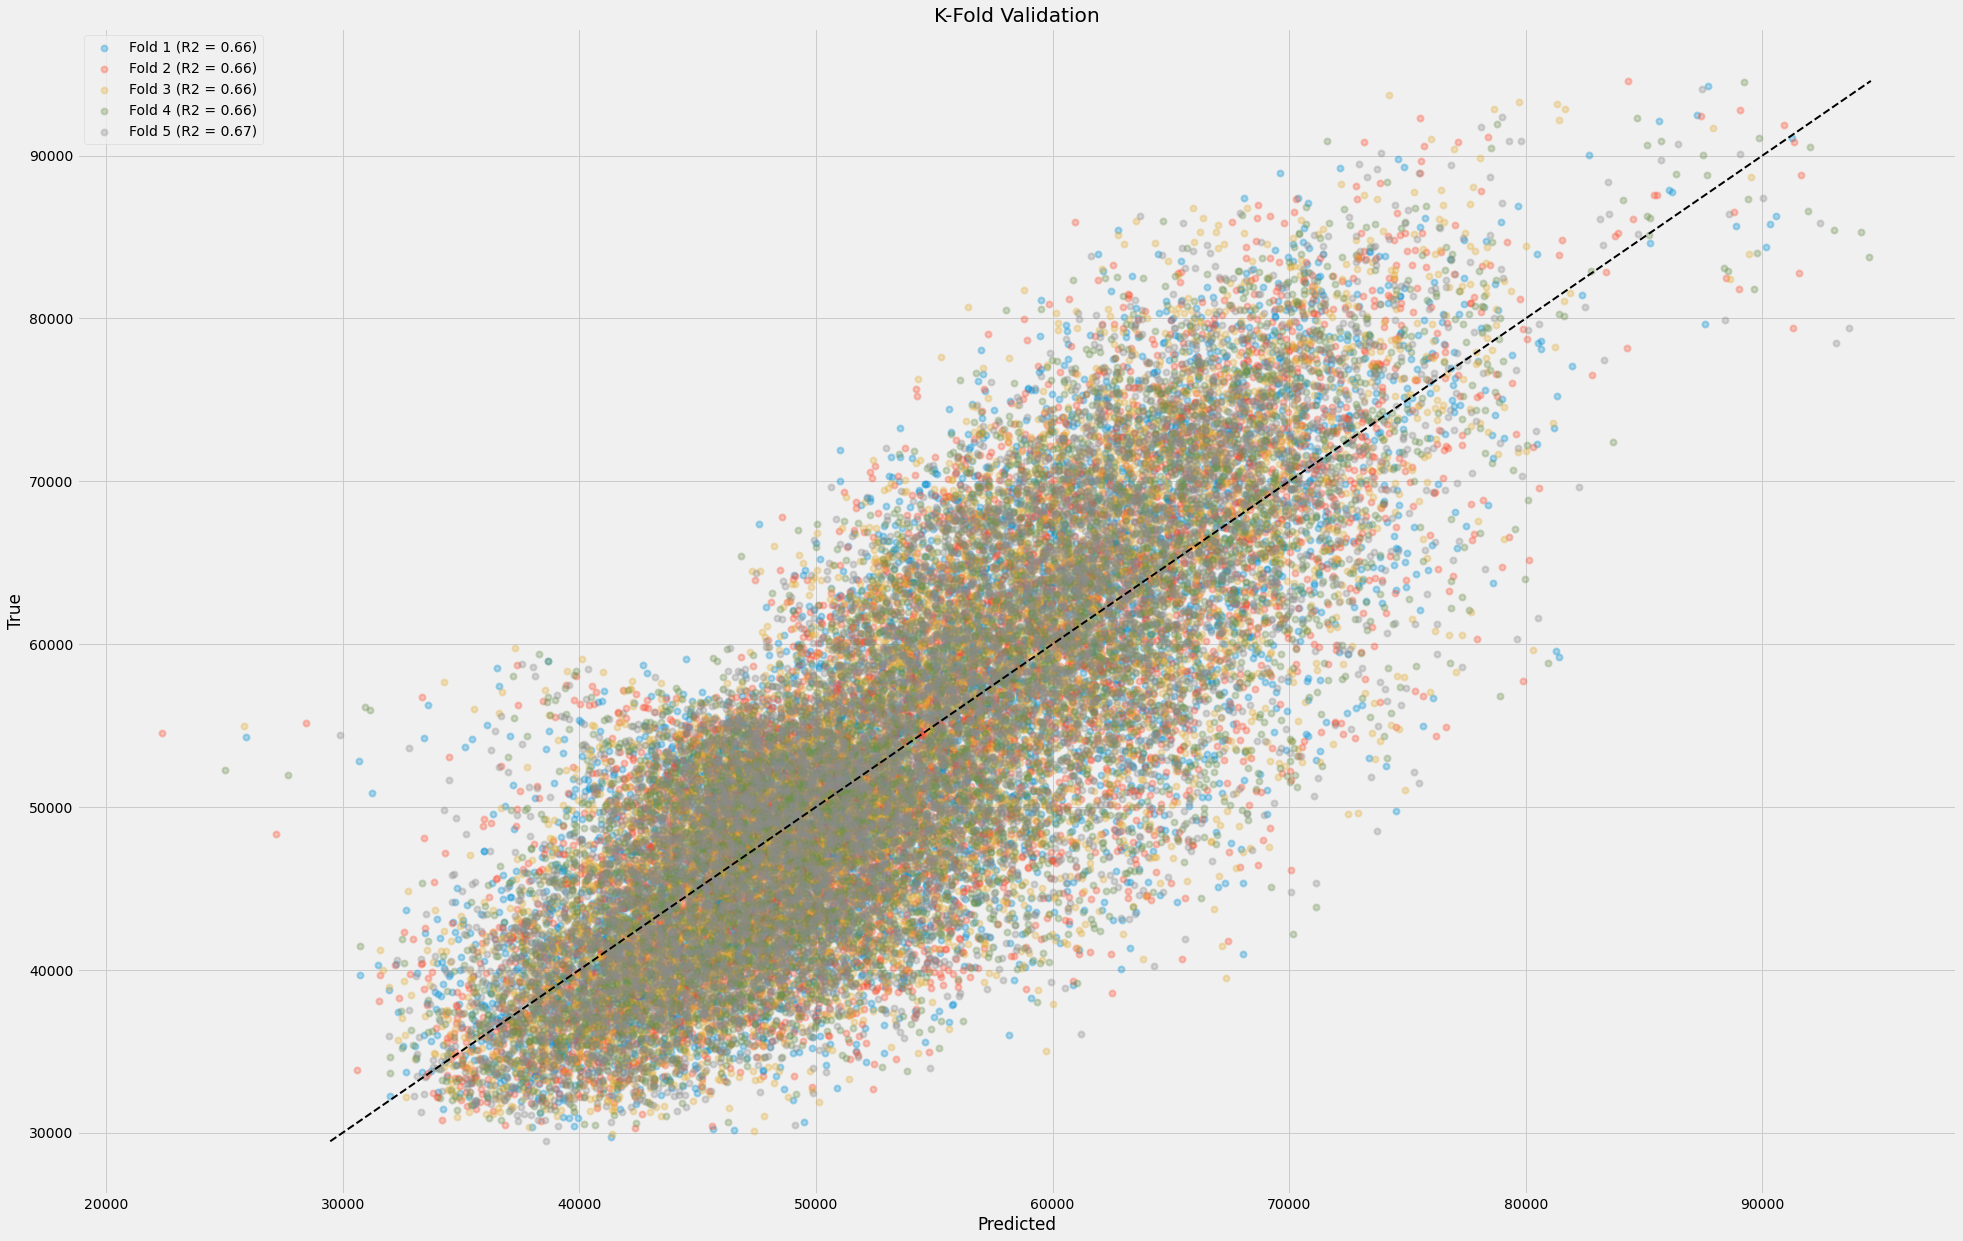

In [25]:
#-Use MLR train and test data
X_names = ["apparent_tmp [Kelvin]", "Month", "Hour", "Weekday", "radiation [W/m2]"
           ,"air_tmp [Kelvin]", "solar_actual [MW]", "albedo [%]"]
X_train = df_train[X_names].values
y_train = df_train["Y"].values

X_test = df_test[X_names].values
y_test = df_test["Y"].values

## call model
model = linear_model.LinearRegression()

## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [26]:
## train
model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)


In [34]:

## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 3))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/predicted)), 3))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
## residuals
residuals = y_test - predicted
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], predicted[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))


R2 (explained variance): 0.659
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.101
Mean Absolute Error (Σ|y-pred|/n): 5,361
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 6,761
Max Error: -26,334


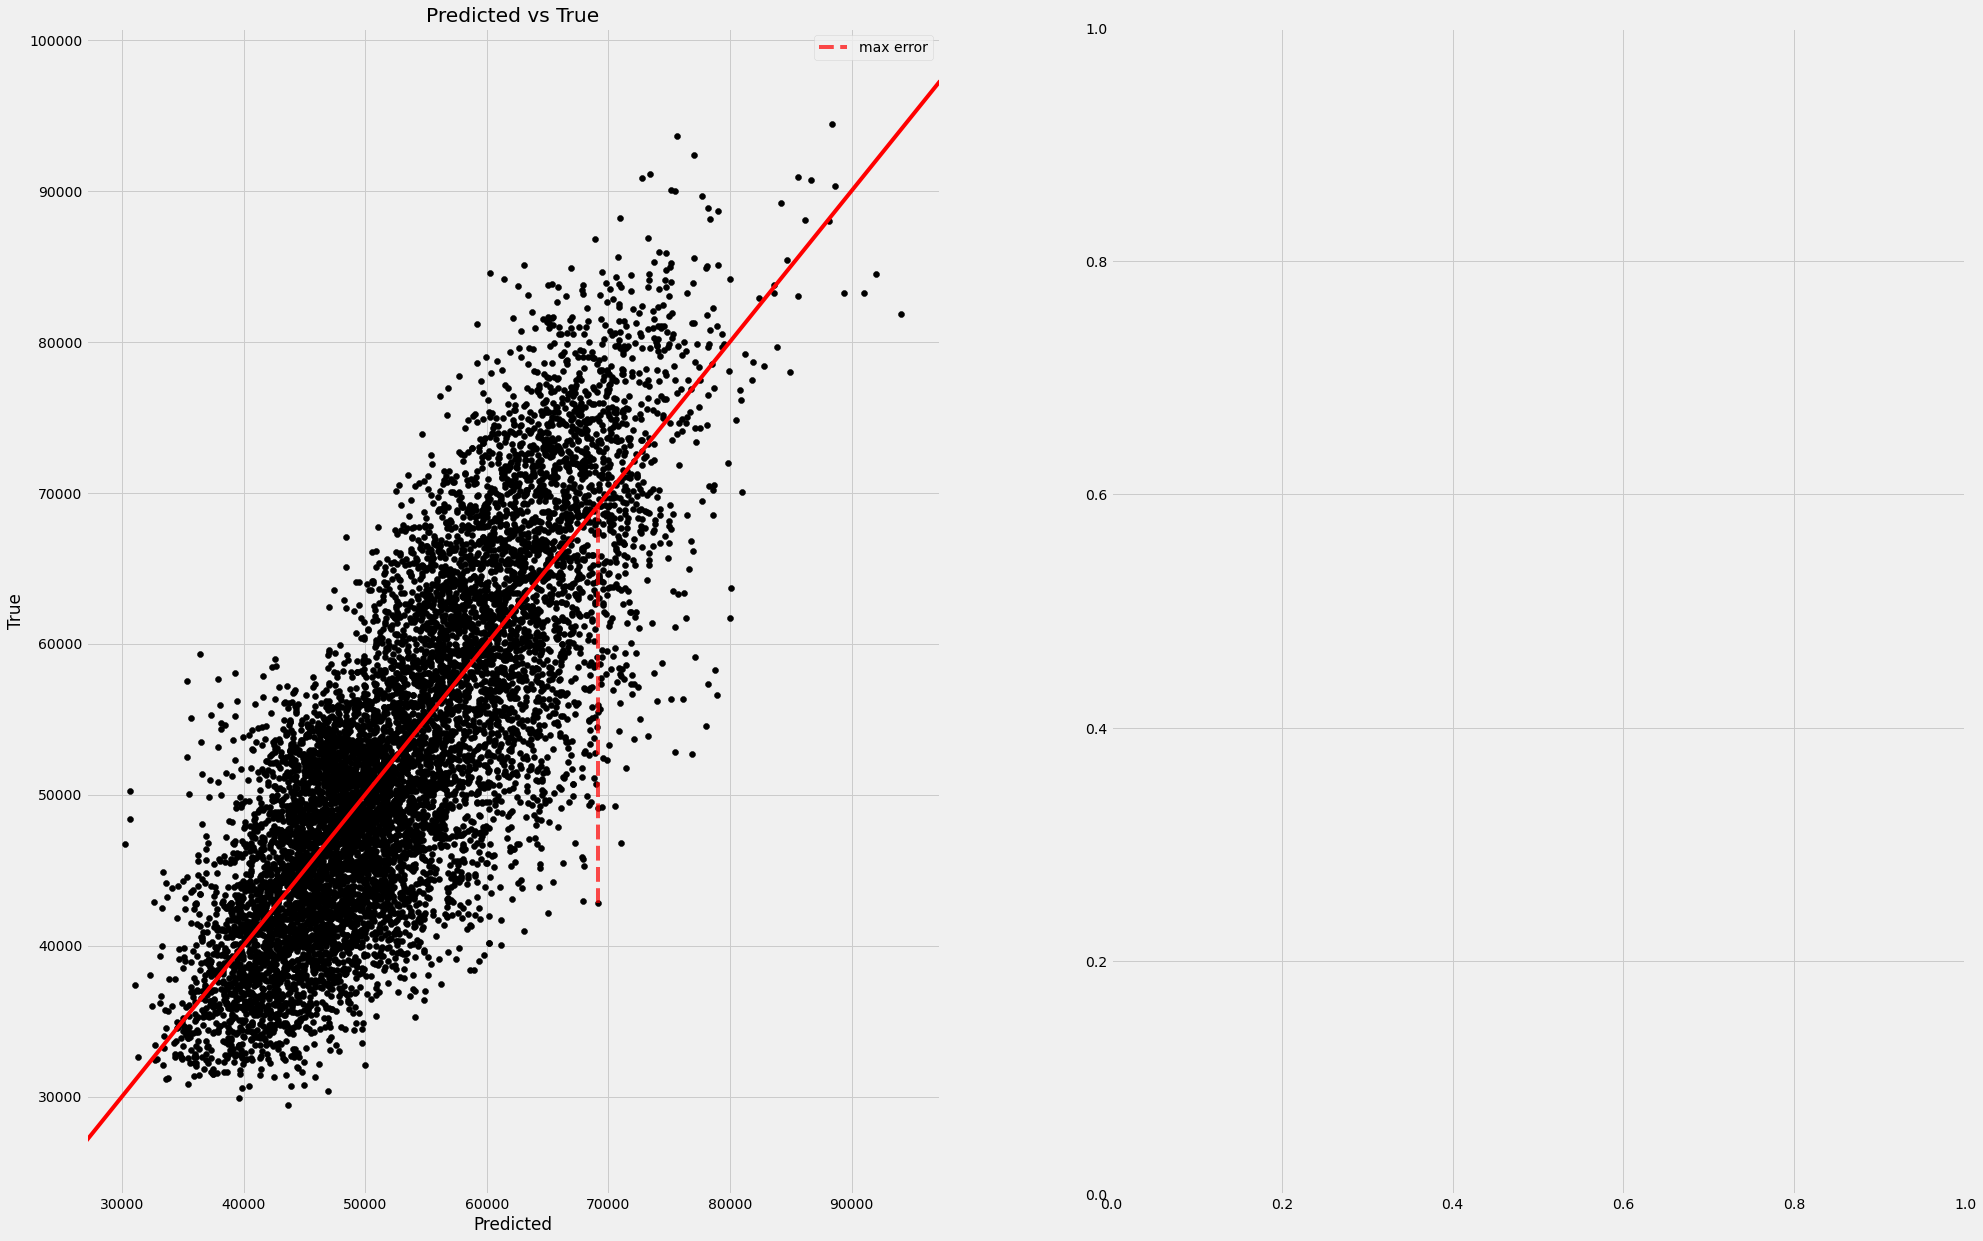

In [33]:
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(predicted, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()
# =============================================================================